In [239]:
import pandas as pd
import seaborn as sns
from src.cleaning import categoric, outliers_IQR
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [240]:
diamond = pd.read_csv('../data/diamonds_train.csv', index_col=0)

In [241]:
test = pd.read_csv('../data/diamonds_test.csv', index_col=0)

In [242]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [243]:
diamond.shape

(40345, 10)

In [244]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [245]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [246]:
print(diamond.cut.unique())
print(diamond.color.unique())
print(diamond.clarity.unique())

['Ideal' 'Very Good' 'Premium' 'Good' 'Fair']
['H' 'D' 'F' 'G' 'I' 'E' 'J']
['VS2' 'VVS2' 'VS1' 'IF' 'SI1' 'SI2' 'VVS1' 'I1']


In [247]:
diamond_copy = diamond.copy()

In [248]:
test_copy = test.copy()

### Option 1: Transform columns cut, color and clarity to categoric

In [249]:
categoric(diamond)
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,5,3,4,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,3,7,6,64.0,56.0,4.14,4.17,2.66,532
2,0.42,4,5,5,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,5,3,8,61.1,57.0,4.16,4.12,2.53,600
4,1.10,2,4,3,63.4,57.0,6.52,6.55,4.14,4997


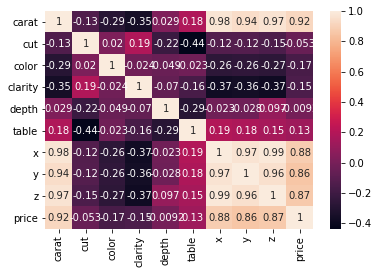

In [250]:
corr_matrix =diamond.corr()
sns.heatmap(corr_matrix, annot=True)

In [251]:
#diamond = diamond.drop(columns=['x', 'y', 'z'])

As we can see, the features 'x', 'y' and 'z' are very high correlated, but after try some trainings without that features it decided to keep it because the results are so similars

In [252]:
diamond.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,3.903532,4.413236,4.058025,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.115488,1.695243,1.648637,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,5.000000,7.000000,8.000000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


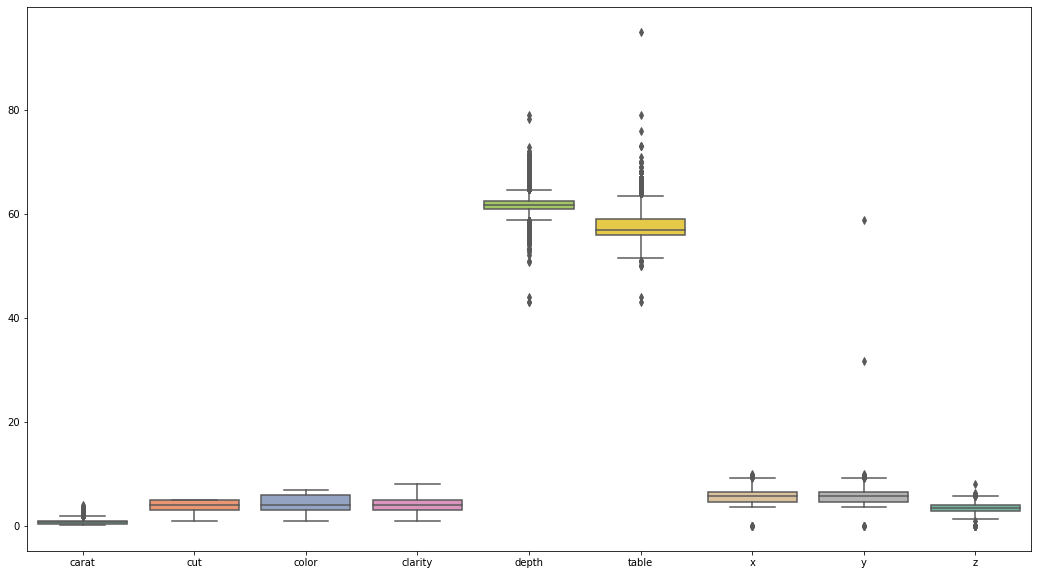

In [229]:
plt.figure(figsize=(18,10))
sns.boxplot(data=diamond.drop(columns=('price')), orient="v", palette="Set2",)

In [157]:
# Removing outliers
# diamond = pd.DataFrame(outliers_IQR(diamond))
# Finally the result is better with outliers

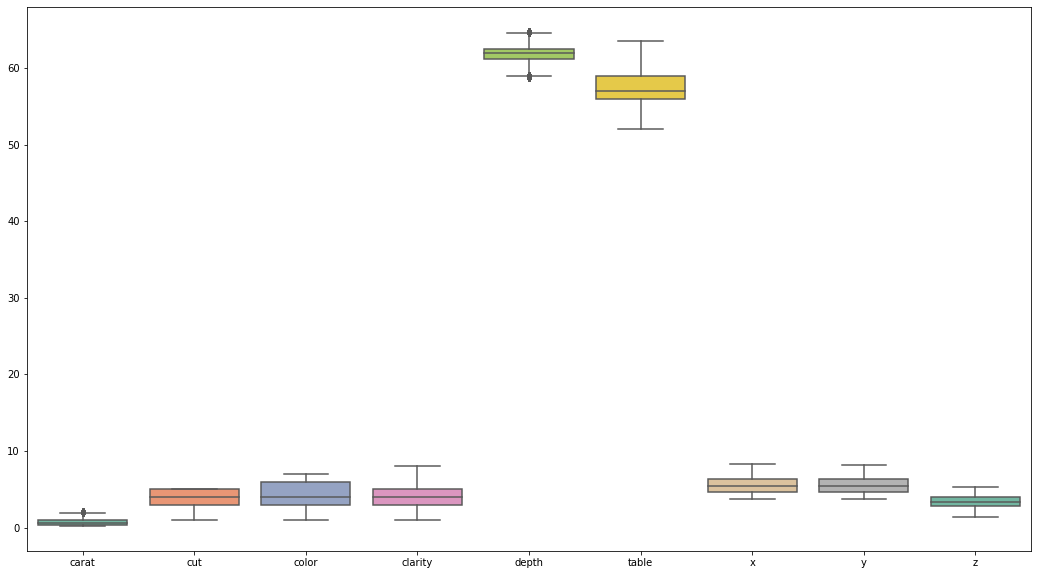

In [133]:
plt.figure(figsize=(18,10))
sns.boxplot(data=diamond.drop(columns=('price')), orient="v", palette="Set2",)

In [253]:
diamond.to_csv('../Diamond-price-prediction/outputs/diamond_train_categoric.csv')

In [254]:
#test = test.drop(columns=['x', 'y', 'z'])

In [255]:
categoric(test)

In [256]:
test.to_csv('../Diamond-price-prediction/outputs/diamond_test_categoric.csv')

### Option 2: Tranform columns cut, color and clarity with get_dummies

In [257]:
diamond_dummies = pd.get_dummies(diamond_copy, columns=["cut", "color", "clarity"])

In [258]:
diamond_dummies.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,63.0,57.0,6.73,6.70,4.23,6134,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.28,64.0,56.0,4.14,4.17,2.66,532,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.42,61.2,58.0,4.86,4.82,2.96,1103,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.26,61.1,57.0,4.16,4.12,2.53,600,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.10,63.4,57.0,6.52,6.55,4.14,4997,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [259]:
diamond_dummies.shape

(40345, 27)

In [260]:
diamond_dummies.to_csv('../Diamond-price-prediction/outputs/diamond_train_dummies.csv')

In [261]:
test_copy = pd.get_dummies(test_copy, columns=["cut", "color", "clarity"])

In [262]:
test_copy.to_csv('../Diamond-price-prediction/outputs/diamond_test_dummies.csv')